<a href="https://colab.research.google.com/github/varunSabnis/pytorch_course_udemy/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install torch

In [0]:
import torch
from torch import nn 
import matplotlib.pyplot as plt
import numpy as np

In [0]:
X = torch.randn(100, 1)*10
y = X  + 3*torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.xlabel('x')
plt.ylabel('y')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

In [0]:
[w, b] = model.parameters()
def get_params():
  w1 = w[0][0].item()
  b1 = b[0].item()
  return w1, b1


In [0]:
def plot_fit(title):
  plt.title = title
  x1 = np.array([-30, 30])
  w1, b1 = get_params()
  print("Weight {}, Bias {}".format(w1,b1))
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

In [0]:
plot_fit('Initial Model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    print("Epoch : {}, Loss : {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

Text(0.5, 0, 'epochs')

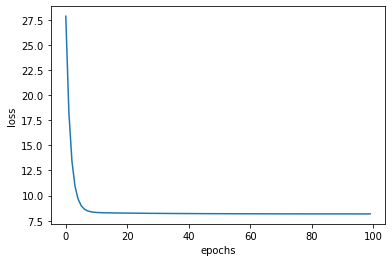

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel("loss")
plt.xlabel("epochs")

Weight 0.9885776042938232, Bias -0.06037868931889534


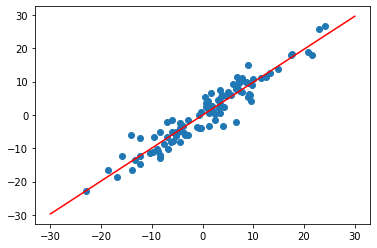

In [18]:
plot_fit("Trained Model")